In [1]:
import sys
sys.path.append("../..") 

In [2]:
import glob,os
import pandas as pd
import matplotlib.pyplot as plt
import torch
import seaborn as sns

In [3]:
# args
RES_PATH = "../../experiments/mimic3/result1/"

In [5]:
def get_metrics_from_folder(path):
    df_tests = []
    for folder in os.listdir(path):
        if folder.startswith('.') == False:
            pathm = os.path.join(path, folder, "metrics.csv")
            pathc = os.path.join(path, folder, "checkpoints/")
            # model name:
            for _, _, files in os.walk(pathc):
                file = [f for f in files if f.endswith('.ckpt')][0]
                chk_path = os.path.join(pathc,file)
            checkpoint = torch.load(chk_path)
            model_name = checkpoint["hyper_parameters"]['net']
            # model results:
            df = pd.read_csv(pathm)
            df_test = df.loc[:,df.columns.str.startswith('test') | df.columns.str.startswith('int')]
            df_test = df_test.dropna()
            df_test.loc[:,'model'] = model_name
            df_tests.append(df_test)
        df_test = pd.concat(df_tests, axis=0)
    return df_test

In [6]:
df_test = get_metrics_from_folder(RES_PATH)

In [7]:
df_test

,test_loss,test_rmse,test_var_pit,test_crps,test_ignorance,test_int_score,int_coverage,int_med_width,int_av_width,model
135,-0.118284,37.306339,0.077188,0.121592,0.118284,1.189976,0.940680,104.658333,131.592514,latentJumpModel
122,-0.110123,37.837299,0.074768,0.122779,0.110123,1.196402,0.946776,112.345322,134.988495,dtLSTMModel
117,-0.082420,38.474373,0.074202,0.125553,0.082420,1.232367,0.946969,114.434761,139.562546,dtRNNModel
140,-0.093621,38.379967,0.073844,0.124532,0.093621,1.215268,0.948248,112.640869,139.583694,dtGRUModel
140,-0.126825,37.233822,0.076247,0.121018,0.126825,1.176763,0.944079,108.423615,131.821533,ctLSTMModel
140,-0.133042,37.014091,0.075758,0.120362,0.133042,1.166937,0.946286,107.468391,132.143753,ctGRUModel
140,-0.121074,37.258907,0.075764,0.121495,0.121074,1.180191,0.945322,109.122498,133.161438,ctRNNModel


In [8]:
df_test_long = pd.melt(df_test, "model", var_name="measurement")

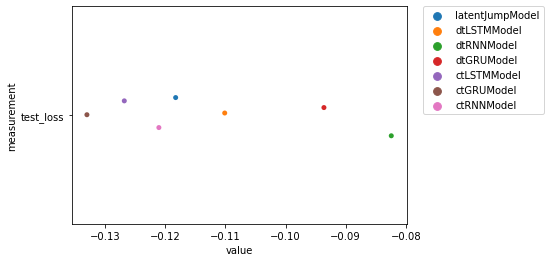

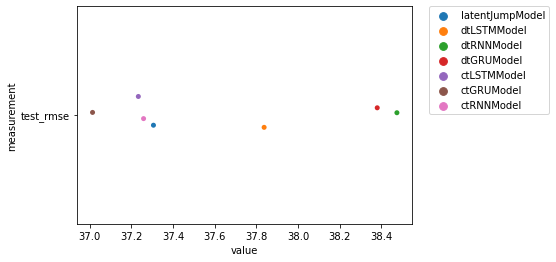

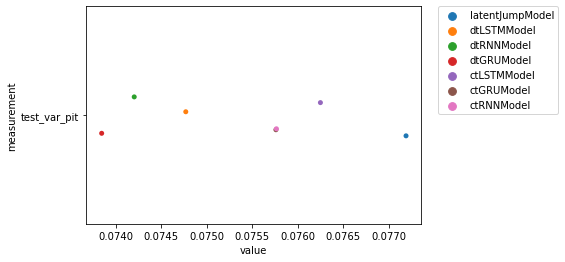

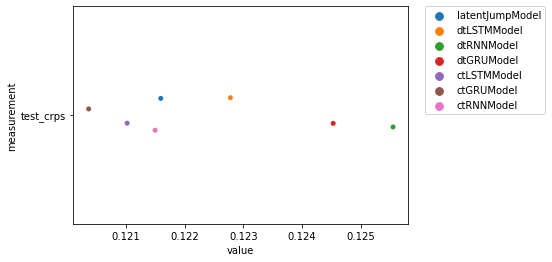

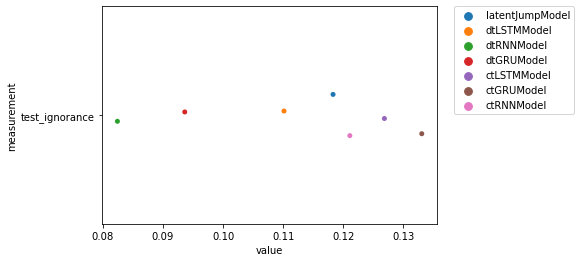

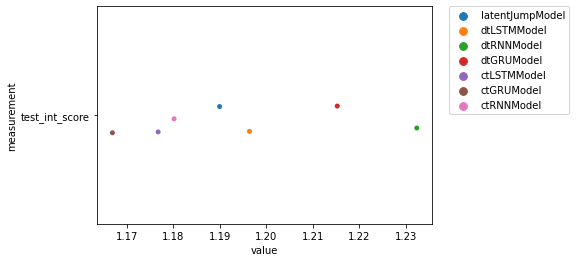

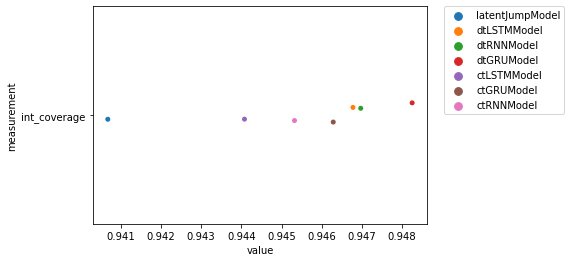

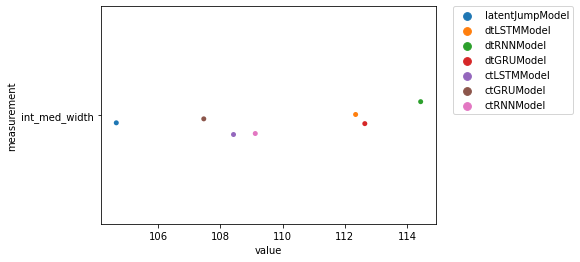

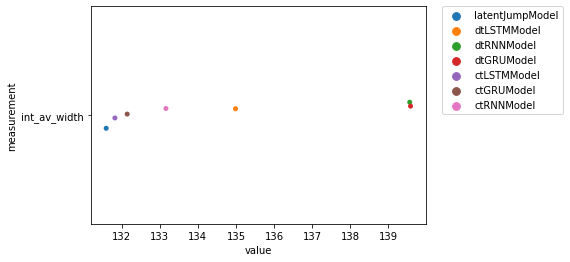

In [9]:
# Initialize the figure
for measure in list(df_test_long.measurement.unique()):
    f, ax = plt.subplots()
    sns.stripplot(x="value", y="measurement", hue="model",
                  data=df_test_long.loc[df_test_long.measurement.isin([measure])])
    #handles, labels = ax.get_legend_handles_labels()
    #ax.legend(loc="lower")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()